In [176]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import skew, kurtosis, norm
from scipy.linalg import sqrtm
import yfinance as yf
import cvxpy as cp
import riskfolio as rp
import scipy.stats as scs

In [177]:
start_date = '2014-02-27'
end_date = '2024-02-29'

tickers = tickers = tickers = [
    "AAPL", "MSFT", "AMZN", "GOOGL", "TSLA", "META", "JPM", "JNJ", "V", "NVDA",
    "DIS", "SQ", "JD", "BRK-B", "WMT", "MA", "HD", "CMCSA", "VZ", "NFLX",
    "T", "PG", "CRM", "PFE", "NKE", "MCD", "XOM", "BAC", "CSCO", "IBM"
]

benchmark = ''

In [178]:
rentabilidad_objetivo = 0.5 / 252

In [179]:
precios = yf.download(tickers,
                      start=start_date,
                      end=end_date)['Adj Close']
precios.head()

[*********************100%%**********************]  30 of 30 completed


Ticker,AAPL,AMZN,BAC,BRK-B,CMCSA,CRM,CSCO,DIS,GOOGL,HD,...,NVDA,PFE,PG,SQ,T,TSLA,V,VZ,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2014-02-27,16.599281,18.0065,13.534191,114.580002,20.628359,66.133614,15.906624,73.826431,30.510761,64.699158,...,4.382887,20.993742,58.341503,NaN,11.314361,16.836000,52.748196,28.695026,20.019415,62.199852
2014-02-28,16.554293,18.1050,13.567023,115.779999,20.874708,62.288631,15.819548,74.129150,30.421673,64.746536,...,4.354457,20.915577,58.692204,NaN,11.209045,16.320667,52.668915,28.743343,20.056999,62.478931
2014-03-03,16.602106,17.9890,13.378251,116.059998,20.596056,61.409782,15.652647,72.890762,30.097347,64.722832,...,4.333136,20.830893,57.811749,NaN,11.184469,16.704000,51.619926,28.580238,19.901272,61.979214
2014-03-04,16.711582,18.1950,13.731173,118.570000,20.741436,62.987720,15.834060,74.954750,30.403152,65.409561,...,4.378148,21.293375,58.535500,NaN,11.286279,16.989332,52.566360,28.936661,20.172457,62.641171
2014-03-05,16.746813,18.6185,14.166431,118.980003,20.955475,63.596924,15.870339,75.844559,30.486986,65.441124,...,4.416055,21.332455,58.065422,NaN,11.279253,16.844000,51.939281,28.622530,20.083849,60.875916


In [180]:
retornos = np.log(precios).diff().dropna()
retornos.head()

Ticker,AAPL,AMZN,BAC,BRK-B,CMCSA,CRM,CSCO,DIS,GOOGL,HD,...,NVDA,PFE,PG,SQ,T,TSLA,V,VZ,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2015-11-20,0.004368,0.010799,-0.002264,0.000000,0.004461,0.004331,0.007281,0.011391,0.022201,0.026065,...,0.008639,-0.003412,-0.005262,-0.016976,0.001189,-0.008103,0.000499,-0.008119,-0.010433,-0.006371
2015-11-23,-0.013078,0.015645,-0.010250,-0.004695,-0.012317,-0.002596,-0.005091,-0.005428,-0.000386,0.017434,...,-0.015086,-0.026769,0.001976,-0.058487,-0.005959,-0.010325,-0.000998,-0.008851,0.003158,0.006123
2015-11-24,0.009551,-0.011614,0.000000,-0.003315,-0.007593,-0.004840,-0.005850,-0.012386,-0.009144,0.008268,...,0.008053,0.020222,0.006298,-0.008285,-0.002094,0.002294,-0.004002,0.004435,-0.005659,0.019734
2015-11-25,-0.007176,0.006224,-0.001719,-0.003029,-0.004226,0.000249,-0.001101,0.006086,-0.000481,0.007828,...,-0.001284,0.027762,-0.007220,-0.010034,0.001795,0.050872,-0.002887,-0.005993,0.005327,-0.007724
2015-11-27,-0.001865,-0.003085,0.002291,-0.003707,0.003090,-0.005487,0.002932,-0.030285,0.003517,0.000668,...,0.008317,-0.002437,-0.002639,0.012526,0.003581,0.008542,0.003514,0.006878,-0.005827,-0.000246


In [181]:
factors = pd.read_csv('F-F_Research_Data_Factors_daily.CSV', skiprows=3)
factors.head()

,Unnamed: 0,Mkt-RF,SMB,HML,RF
0,19260701,0.10,-0.25,-0.27,0.009
1,19260702,0.45,-0.33,-0.06,0.009
2,19260706,0.17,0.30,-0.39,0.009
3,19260707,0.09,-0.58,0.02,0.009
4,19260708,0.21,-0.38,0.19,0.009


In [182]:
factors.columns = ['date', 'mkt-rf', 'smb', 'hml', 'rf']
factors.head()

,date,mkt-rf,smb,hml,rf
0,19260701,0.10,-0.25,-0.27,0.009
1,19260702,0.45,-0.33,-0.06,0.009
2,19260706,0.17,0.30,-0.39,0.009
3,19260707,0.09,-0.58,0.02,0.009
4,19260708,0.21,-0.38,0.19,0.009


In [183]:
factors['date'] = factors['date'].astype(str)
factors.head()

,date,mkt-rf,smb,hml,rf
0,19260701,0.10,-0.25,-0.27,0.009
1,19260702,0.45,-0.33,-0.06,0.009
2,19260706,0.17,0.30,-0.39,0.009
3,19260707,0.09,-0.58,0.02,0.009
4,19260708,0.21,-0.38,0.19,0.009


In [184]:
factors['date'] = pd.to_datetime(factors['date'],format='%Y%m%d', errors='coerce').dt.strftime("%Y-%m-%d")
factors.head()

,date,mkt-rf,smb,hml,rf
0,1926-07-01,0.10,-0.25,-0.27,0.009
1,1926-07-02,0.45,-0.33,-0.06,0.009
2,1926-07-06,0.17,0.30,-0.39,0.009
3,1926-07-07,0.09,-0.58,0.02,0.009
4,1926-07-08,0.21,-0.38,0.19,0.009


In [185]:
factors = factors.set_index('date')
factors.head()

,mkt-rf,smb,hml,rf
date,,,,
1926-07-01,0.10,-0.25,-0.27,0.009
1926-07-02,0.45,-0.33,-0.06,0.009
1926-07-06,0.17,0.30,-0.39,0.009
1926-07-07,0.09,-0.58,0.02,0.009
1926-07-08,0.21,-0.38,0.19,0.009


In [186]:
factors = factors.loc[start_date:end_date]
factors = factors.drop(start_date)
factors.head()

,mkt-rf,smb,hml,rf
date,,,,
2014-02-28,0.15,-0.73,0.84,0.0
2014-03-03,-0.70,0.09,0.14,0.0
2014-03-04,1.67,1.10,-0.12,0.0
2014-03-05,0.01,-0.27,0.29,0.0
2014-03-06,0.16,-0.32,0.77,0.0


In [187]:
factors.index = pd.to_datetime(factors.index)
factors.head()

,mkt-rf,smb,hml,rf
date,,,,
2014-02-28,0.15,-0.73,0.84,0.0
2014-03-03,-0.70,0.09,0.14,0.0
2014-03-04,1.67,1.10,-0.12,0.0
2014-03-05,0.01,-0.27,0.29,0.0
2014-03-06,0.16,-0.32,0.77,0.0


In [188]:
factors = factors.apply(pd.to_numeric, errors='coerce').div(100)
factors.head()

,mkt-rf,smb,hml,rf
date,,,,
2014-02-28,0.0015,-0.0073,0.0084,0.0
2014-03-03,-0.0070,0.0009,0.0014,0.0
2014-03-04,0.0167,0.0110,-0.0012,0.0
2014-03-05,0.0001,-0.0027,0.0029,0.0
2014-03-06,0.0016,-0.0032,0.0077,0.0


In [189]:
retornos_rf = factors['rf'].to_numpy()
rf = retornos_rf.mean()

In [190]:
pesos_carteras = pd.DataFrame()

In [191]:
# CARTERA MAXIMO SHARPE

def cartera_max_sharpe(retornos, rf):
    num_act = len(retornos.columns)
    retornos_esperados = retornos.mean().to_numpy()
    matriz_cov = retornos.cov().to_numpy()

    x = cp.Variable(num_act)
    pesos = x / cp.sum(x)

    pi = retornos_esperados - rf

    riesgo = cp.quad_form(x, matriz_cov)

    restricciones = [pi @ x == 1,
                    x >= 0]

    objetivo = cp.Minimize(riesgo)

    problema = cp.Problem(objetivo, restricciones)

    resultado = problema.solve('ECOS')

    pesos_sharpe = np.round(pesos.value, 4)
    pesos_sharpe[pesos_sharpe <= 1e-4] = 0
    
    return pesos_sharpe

In [192]:
pesos_carteras['max_sharpe'] = cartera_max_sharpe(retornos, rf)

In [193]:
activos_filtrados_sharpe = [asset for i, asset in enumerate(retornos.columns) if pesos_carteras['max_sharpe'][i] > 0]
pesos_filtrados_sharpe = [x for x in pesos_carteras['max_sharpe'] if x > 0]

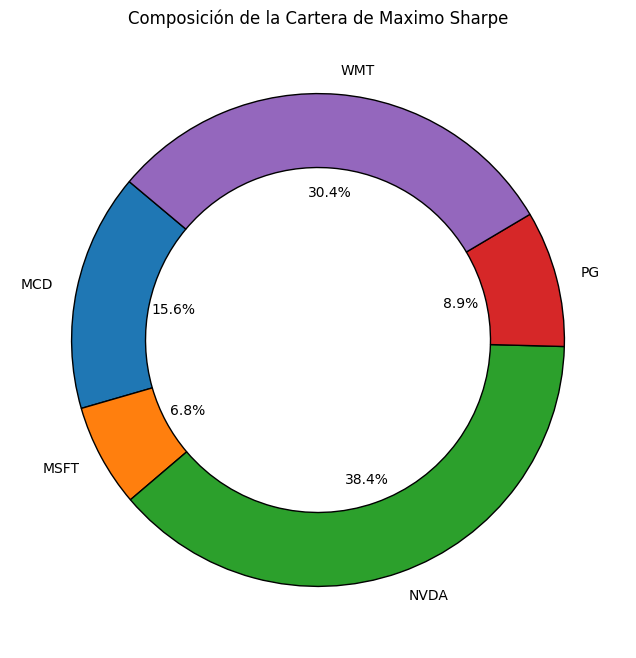

In [194]:
# Crear el gráfico de donut
plt.figure(figsize=(8, 8))

plt.pie(pesos_filtrados_sharpe, labels=activos_filtrados_sharpe, autopct='%1.1f%%', startangle=140, wedgeprops={'width': 0.3, 'edgecolor': 'black'})

# Añadir título
plt.title('Composición de la Cartera de Maximo Sharpe')

# Mostrar el gráfico
plt.show()

In [195]:
retornos_max_sharpe = retornos @ list(pesos_carteras['max_sharpe'])
rentabilidad_max_sharpe = retornos_max_sharpe.mean()
riesgo_max_sharpe = retornos_max_sharpe.std()

In [196]:
w = (rentabilidad_objetivo - rentabilidad_max_sharpe) / (rf - rentabilidad_max_sharpe) # Peso en rf

In [197]:
rentabilidad_cartera_capm = w * rf + (1 - w) * rentabilidad_max_sharpe
riesgo_cartera_capm = (1 - w) * riesgo_max_sharpe

In [198]:
rentabilidad_cartera_capm

0.0019841269841269836

In [199]:
print(f'Apalancamiento Actvo Libre de Riesgo: {-round(w * 100, 2)}%\nPeso Cartera de Maximo Sharpe: {round((1-w) * 100, 2)}%\nRenatbilidad Cartera CAPM: {round(rentabilidad_cartera_capm * 252 * 100, 2)}%\nRiesgo Cartera CAPM: {round(riesgo_cartera_capm * np.sqrt(252) * 100, 2)}%')

Apalancamiento Actvo Libre de Riesgo: 63.31%
Peso Cartera de Maximo Sharpe: 163.31%
Renatbilidad Cartera CAPM: 50.0%
Riesgo Cartera CAPM: 40.44%


In [200]:
def cartera_min_riesgo(retornos):
    num_act = len(retornos.columns)
    retornos_esperados = retornos.mean().to_numpy()
    matriz_cov = retornos.cov().to_numpy()
    
    pesos = cp.Variable(num_act)

    rentabilidad = retornos_esperados @ pesos
    riesgo = cp.quad_form(pesos, matriz_cov)

    restricciones = [cp.sum(pesos) == 1,
                    pesos >= 0]

    objetivo = cp.Minimize(riesgo)

    problema = cp.Problem(objetivo, restricciones)

    resultado = problema.solve('ECOS')

    pesos_min_riesgo = np.round(pesos.value, 4)
    pesos_min_riesgo[pesos_min_riesgo <= 1e-4] = 0

    return pesos_min_riesgo

In [201]:
def frontera_eficiente(retornos):
    num_act = len(retornos.columns)
    retornos_esperados = retornos.mean().to_numpy()
    matriz_cov = retornos.cov().to_numpy()


    pesos_min_riesgo = cartera_min_riesgo(retornos)
    retornos_min_riesgo = retornos @ pesos_min_riesgo
    riesgo_min_riesgo = retornos_min_riesgo.std()


    imax = np.argmax(retornos.mean())
    max_riesgo = np.sqrt(matriz_cov[imax, imax])
    riesgos = np.linspace(riesgo_min_riesgo, max_riesgo, 200)
    rentabilidades = []
    for risk in riesgos:
        pesos = cp.Variable(num_act)

        rent = retornos_esperados @ pesos
        riesgo = cp.quad_form(pesos, matriz_cov)
        
        restricciones = [cp.sum(pesos) == 1,
                        pesos >= 0,
                        riesgo <= risk**2]

        objetivo = cp.Maximize(rent)

        problema = cp.Problem(objetivo, restricciones)

        resultado = problema.solve("ECOS")
        
        pesos = pesos.value
        retornos_cartera = retornos @ pesos
        rent = retornos_cartera.mean()
        rentabilidades.append(rent)
    rentabilidades = np.array(rentabilidades)

    return riesgos, rentabilidades

In [202]:
riesgos_frontera, rentabilidades_frontera = frontera_eficiente(retornos)

c:\Users\danto\AppData\Local\Programs\Python\Python311\Lib\site-packages\cvxpy\problems\problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


In [203]:
def cartera_equiponderada(retornos):
    num_act = len(retornos.columns)
    pesos = np.round(np.ones(num_act) / num_act, 4)
    return pesos

In [204]:
pesos_carteras['equiponderada'] = cartera_equiponderada(retornos)
peso_activo_equiponderada = pesos_carteras['equiponderada'][0]

retornos_cartera_equiponderada = retornos @ list(pesos_carteras['equiponderada'])
rentabilidad_cartera_equiponderada = retornos_cartera_equiponderada.mean()
riesgo_cartera_equiponderada = retornos_cartera_equiponderada.std()

In [205]:
print(f'Pesos Cartera Equponderada: {round(peso_activo_equiponderada * 100, 2)}%\nRenatbilidad Cartera Equiponderada: {round(rentabilidad_cartera_equiponderada * 252 * 100, 2)}%\nRiesgo Cartera Equiponderada: {round(riesgo_cartera_equiponderada * np.sqrt(252) * 100, 2)}%')

Pesos Cartera Equponderada: 3.33%
Renatbilidad Cartera Equiponderada: 14.39%
Riesgo Cartera Equiponderada: 19.61%


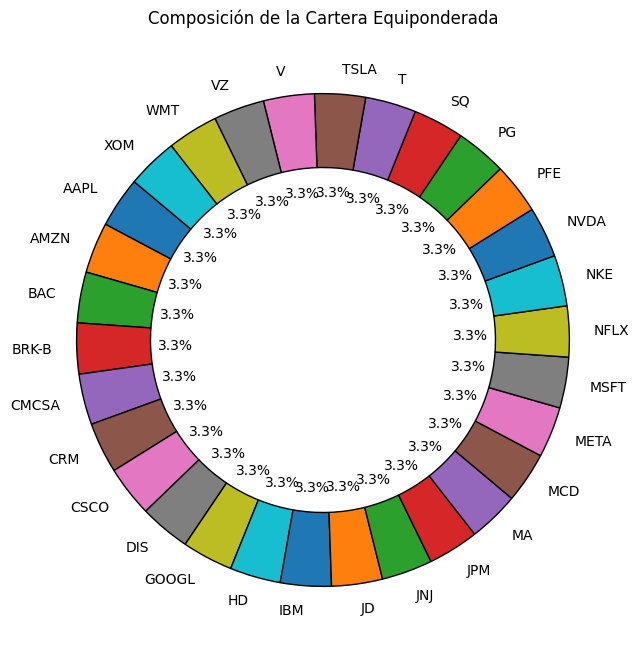

In [206]:
# Crear el gráfico de donut
plt.figure(figsize=(8, 8))

plt.pie(pesos_carteras['equiponderada'], labels=retornos.columns, autopct='%1.1f%%', startangle=140, wedgeprops={'width': 0.3, 'edgecolor': 'black'})

# Añadir título
plt.title('Composición de la Cartera Equiponderada')

# Mostrar el gráfico
plt.show()

In [207]:
def cartera_min_cvar(ret, alpha=0.5):
    retornos = ret.to_numpy()
    retornos_esperados = ret.mean().to_numpy()
    num_data, num_act = retornos.shape
    
    pesos = cp.Variable(num_act)
    t = cp.Variable()
    ui = cp.Variable(num_data)

    cvar = t + cp.sum(ui)/(alpha * num_data)
    retornos_cartera = retornos_esperados.T @ pesos
    
    restricciones = [
        -retornos @ pesos - t - ui <= 0,
        ui >= 0,
        cp.sum(pesos) == 1,
        pesos >= 0]
    
    objectivo = cp.Minimize(cvar)

    problema = cp.Problem(objectivo, restricciones)
    resultado = problema.solve()
    
    pesos_min_cvar = np.round(pesos.value, 4)
    pesos_min_cvar[pesos_min_cvar <= 1e-04] = 0

    return pesos_min_cvar

In [208]:
pesos_carteras['min_cvar'] = cartera_min_cvar(retornos)
retornos_min_cvar = retornos @ list(pesos_carteras['min_cvar'])
rentabilidad_min_cvar = retornos_min_cvar.mean()
riesgo_min_cvar = retornos_min_cvar.std()

c:\Users\danto\AppData\Local\Programs\Python\Python311\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


In [209]:
activos_filtrados_min_cvar = [asset for i, asset in enumerate(retornos.columns) if pesos_carteras['min_cvar'][i] > 0]
pesos_filtrados_min_cvar = [x for x in pesos_carteras['min_cvar'] if x > 0]

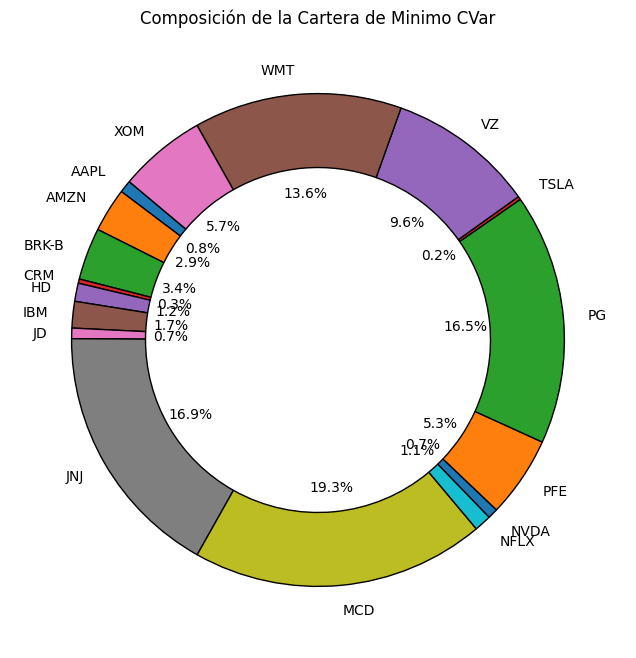

In [210]:
# Crear el gráfico de donut
plt.figure(figsize=(8, 8))

plt.pie(pesos_filtrados_min_cvar, labels=activos_filtrados_min_cvar, autopct='%1.1f%%', startangle=140, wedgeprops={'width': 0.3, 'edgecolor': 'black'})

# Añadir título
plt.title('Composición de la Cartera de Minimo CVar')

# Mostrar el gráfico
plt.show()

In [211]:
def cartera_max_drawdown(ret, alpha=0.05):
    retornos = ret.to_numpy()
    retornos_esperados = ret.mean().to_numpy()
    
    num_data, num_act = retornos.shape
    
    pesos = cp.Variable(num_act)
    t = cp.Variable()
    uj = cp.Variable(num_data)
    dj = cp.Variable(num_data+1)

    riesgo = t + cp.sum(uj)/(alpha * num_data)
    #retornos_cartera = retornos_esperados.T @ pesos

    restricciones = [dj[1:] - t - uj <= 0,
                    dj[1:] >= dj[:-1] - retornos @ pesos,
                    uj >= 0,
                    dj >= 0,
                    dj[0] == 0,
                    cp.sum(pesos) == 1,
                    pesos >= 0,
                ]

    objetivo = cp.Minimize(riesgo)

    prob = cp.Problem(objetivo, restricciones)
    prob.solve()

    pesos_max_drawdown = np.round(pesos.value, 4)
    pesos_max_drawdown[pesos_max_drawdown <= 1e-04] = 0

    return pesos_max_drawdown

In [212]:
pesos_carteras['max_drawdown'] = cartera_max_drawdown(retornos)
retornos_max_drawdown = retornos @ list(pesos_carteras['max_drawdown'])
rentabilidad_max_drawdown = retornos_max_drawdown.mean()
riesgo_max_drawdown = retornos_max_drawdown.std()

c:\Users\danto\AppData\Local\Programs\Python\Python311\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


In [213]:
activos_filtrados_max_drawdown = [asset for i, asset in enumerate(retornos.columns) if pesos_carteras['max_drawdown'][i] > 0]
pesos_filtrados_max_drawdown = [x for x in pesos_carteras['max_drawdown'] if x > 0]

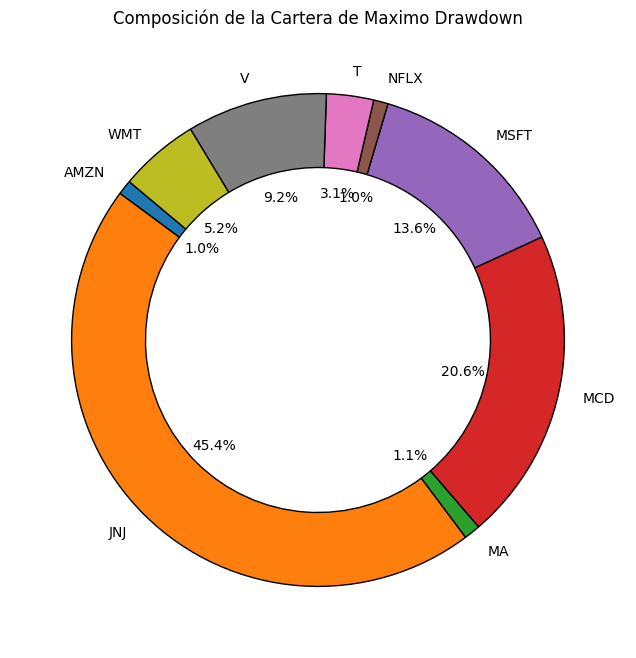

In [214]:
# Crear el gráfico de donut
plt.figure(figsize=(8, 8))

plt.pie(pesos_filtrados_max_drawdown, labels=activos_filtrados_max_drawdown, autopct='%1.1f%%', startangle=140, wedgeprops={'width': 0.3, 'edgecolor': 'black'})

# Añadir título
plt.title('Composición de la Cartera de Maximo Drawdown')

# Mostrar el gráfico
plt.show()

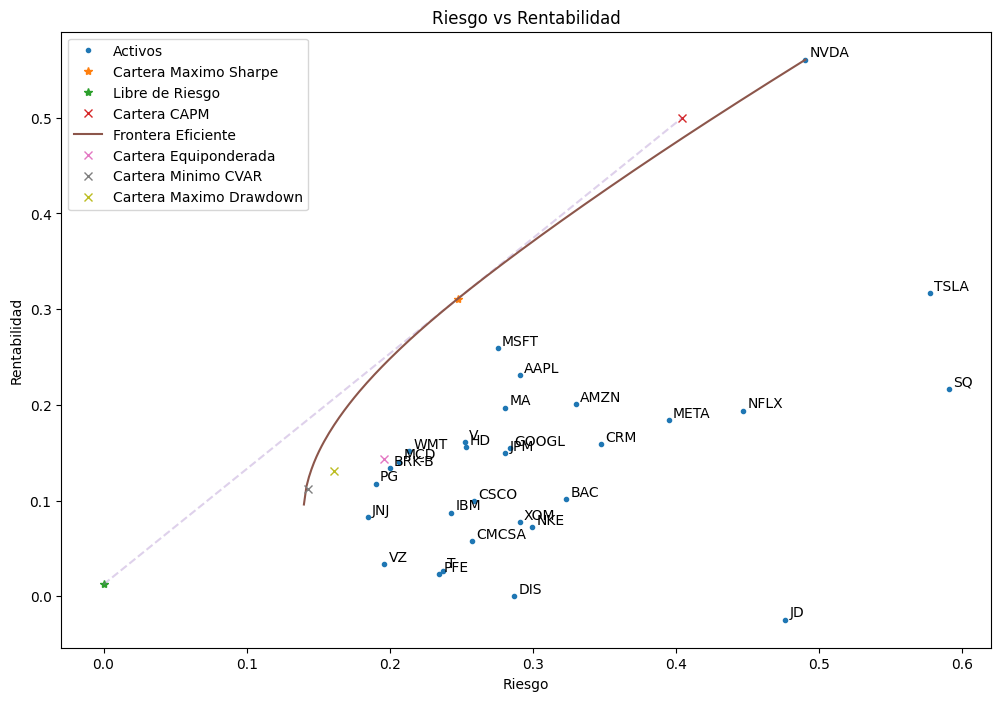

In [215]:
plt.figure(figsize=(12, 8))

plt.plot(retornos.std() * np.sqrt(252), retornos.mean() * 252, '.', label='Activos')
for i in retornos.columns:
    plt.text(retornos[i].std() * np.sqrt(252) + 0.003, retornos[i].mean() * 252 + 0.003, i)

plt.plot(riesgo_max_sharpe * np.sqrt(252), rentabilidad_max_sharpe * 252, '*', label='Cartera Maximo Sharpe')

plt.plot(rf.std() * np.sqrt(252), rf.mean() * 252, '*', label='Libre de Riesgo')

plt.plot(riesgo_cartera_capm * np.sqrt(252), rentabilidad_cartera_capm * 252, 'x', label='Cartera CAPM')

plt.plot([0, riesgo_cartera_capm * np.sqrt(252)], [rf * 252, rentabilidad_cartera_capm * 252], '--', alpha=0.3)

plt.plot(riesgos_frontera * np.sqrt(252), rentabilidades_frontera * 252, '-', label='Frontera Eficiente')

plt.plot(riesgo_cartera_equiponderada * np.sqrt(252), rentabilidad_cartera_equiponderada * 252, 'x', label='Cartera Equiponderada')

plt.plot(riesgo_min_cvar * np.sqrt(252), rentabilidad_min_cvar * 252, 'x', label='Cartera Minimo CVAR')

plt.plot(riesgo_max_drawdown * np.sqrt(252), rentabilidad_max_drawdown * 252, 'x', label='Cartera Maximo Drawdown')

plt.title('Riesgo vs Rentabilidad')
plt.xlabel('Riesgo')
plt.ylabel('Rentabilidad')
plt.plot()
plt.legend()